# 1. Подготовительный этап

Отключим предупреждения, выводимые при выполнении кода, так как они занимают много места и визуально мешают

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import time

**Импортируем датасет в pandas.dataFrame**

In [8]:
import pandas as pd
df = pd.read_csv("data.csv", index_col=0)
df

,password,strength
0,talisman1,1
1,234567890,0
2,paulinho7,1
3,omodos123,1
4,IIIIIIIIII,0
...,...,...
26805,memo94,0
26806,elrey1,0
26807,УКЕНГШЩЗ,0
26808,gcj8p8x5,1


**Импортируем датасет в pandas.dataFrame**

**Очистка датасета от возможных отсутствующих значений.**\
**Если найдутся строки, где хотя бы одно значение NaN, они будут удалены, так как в данном датасете всего два столбца, и записи, в которых отсутствует пароль и/или его стойкость к взлому, нам не потребуются.**

In [9]:
print("Количество записей датасета:", len(df))
print("Количество отсутствующих значений в столбце password:", len(df[df['password'].isnull()]))
print("Количество отсутствующих значений в столбце strength:", len(df[df['strength'].isnull()]))
print("Записи с отсутствующими значениями удалены")

Количество записей датасета: 26810
Количество отсутствующих значений в столбце password: 0
Количество отсутствующих значений в столбце strength: 0
Записи с отсутствующими значениями удалены


**Атрибут password - строковое представление пароля.**

**Атрибут strength - стойкость пароля ко взлому:**\
**0 - слабый (относительно легко взломать)**\
**1 - средний (стойкость средняя)**\
**2 - сильный (взломать сложно)**

**Добавим в датасет следующие признаки:**

**length - длина пароля (количество символов)**\
**digit - признак, отвечающий за содержание цифр в пароле (0 - нет, 1 - да)**\
**lower & upper - содержит ли пароль одновременно заглавные и строчные буквы (0 - нет, 1 - да)**\
**other_symbols - содержит ли пароль особые символы (0 - нет, 1 - да)**\
**distinct_symbols - сколько различных символов содержит пароль**\
**seq - признак, отвечающий за наличие в пароле простых последовательностей вроде "12345678" или "qwerty". Его значение колеблется от 0 до 1, где 1 - пароль полностью состоит из такой последовательности, 0 - в пароле нет ни одной пары, входящей в такую последовательность.**

In [10]:
df['length'] = df["password"].str.len()

In [11]:
def is_digit_in_password(password1):
    password = str(password1)
    for x in password:
        if x in "0123456789":
            return 1
    return 0
df["digit"] = df.apply(lambda x: is_digit_in_password(x["password"]), axis=1)

In [12]:
def lower_upper(password1):
    password = str(password1)
    if not(password.lower() == password or password.upper() == password):
        return 1
    return 0
df["lower & upper"] = df.apply(lambda x: lower_upper(x["password"]), axis=1)

In [13]:
def other_symbols(password1):
    password = str(password1)
    for x in password:
        if x not in "0123456789" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" and x not in "ABCDEFGHIJKLMNOPQRSTUVWXYZ".lower():
            return 1
    return 0
df["other_symbols"] = df.apply(lambda x: other_symbols(x["password"]), axis=1)

In [14]:
def distinct_symbols(password1):
    password = str(password1)
    c = 0
    p = ""
    for x in password:
        if x not in p:
            c += 1
            p += x
    return c
df["distinct_symbols"] = df.apply(lambda x: distinct_symbols(x["password"]), axis=1)

In [15]:
def are_neighbours(s1, s2):
  s = '''qwertyuiop[]asdfghjkl;'zxcvbnm,./;',./!@#$%^&*()_+!"№;%:?*()_+йцукенгшщзхъ\фывапролджэячсмитьбю.'''
  if abs(ord(s1) - ord(s2)) == 1:
    return True
  if s1.lower() + s2.lower() in s:
    return True
  return False

def seq(password1):
  password = str(password1)
  c = 0
  for x in range(len(password) - 1):
    if are_neighbours(password[x], password[x + 1]):
      c += 1
  return c#/ (len(password) - 1)

df["seq"] = df.apply(lambda x: seq(x["password"]), axis=1)

# 2. Анализ данных

**Для наглядности выведем на экран 20 случайных записей нашего dataframe**

In [16]:
df.sample(n=20)

,password,strength,length,digit,lower & upper,other_symbols,distinct_symbols,seq
1472,yzed70,0,6,1,0,0,6,2
14334,mark42,0,6,1,0,0,6,0
13152,FIXE16,0,6,1,0,0,6,0
6753,fodase12,1,8,1,0,0,8,2
20857,u28w3n7d,1,8,1,0,0,8,0
21138,sikilehy16,1,10,1,0,0,9,0
7894,jrdrg1997,1,9,1,0,0,7,0
19369,namida49,1,8,1,0,0,7,0
19537,cpanel12,1,8,1,0,0,8,1
19631,4kuli6e,0,7,1,0,0,7,0


**Признак strength - стойкость пароля ко взлому по шкале от 0 до 2.**

**Изобразим на круговой диаграмме частотность каждой из оценки частотности паролей:**

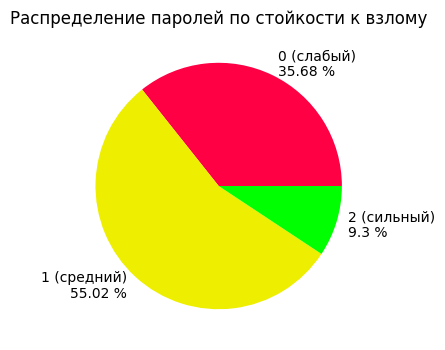

In [17]:
import matplotlib.pyplot as plt

d0 = len(df[df["strength"] == 0]) / len(df) * 100
d1 = len(df[df["strength"] == 1]) / len(df) * 100
d2 = len(df[df["strength"] == 2]) / len(df) * 100

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
vals = [d0, d1, d2]
labels = ['''0 (слабый)
{} %'''.format(round(d0, 2)), 
          '''1 (средний)
{} %'''.format(round(d1, 2)), 
          '''2 (сильный)
{} %'''.format(round(d2, 2))]
colors = ["#F04", "#EE0", "#0F0"]
ax.pie(vals, labels=labels, colors=colors)
plt.title("Распределение паролей по стойкости к взлому")
plt.show()

**Данная диаграмма показывает, что датасет в некоторой степени несбалансирован по классам.**

**Чтобы отобразить основные характеристики атрибутов датасета (такие как сумма, среднее арифметическое и другие), используем метод df.describe**

In [18]:
df.describe()

,strength,length,digit,lower & upper,other_symbols,distinct_symbols,seq
count,26810.000000,26810.000000,26810.000000,26810.000000,26810.000000,26810.000000,26810.000000
mean,0.736181,9.866169,0.755352,0.085901,0.187617,7.527005,1.724730
std,0.616610,2.732506,0.429886,0.280223,0.390413,3.542514,2.532702
min,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,8.000000,1.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,9.000000,1.000000,0.000000,0.000000,8.000000,1.000000
75%,1.000000,11.000000,1.000000,0.000000,0.000000,9.000000,2.000000
max,2.000000,64.000000,1.000000,1.000000,1.000000,43.000000,23.000000


**Отобразим частотность использования длин паролей на диаграмме рассеяния**

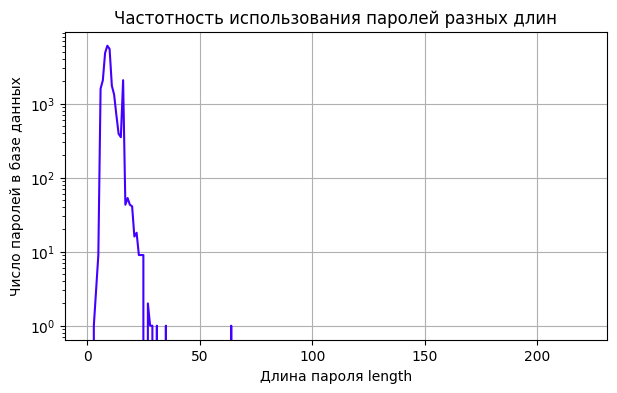

In [19]:
import matplotlib.pyplot as plt

length_count = list(map(lambda x: len(df[df["length"] == x]), [x for x in range(1, 221)]))
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
plt.title("Частотность использования паролей разных длин")
plt.xlabel("Длина пароля length")
plt.ylabel("Число паролей в базе данных")
ax.semilogy([x for x in range(1, 221)], length_count, color="#40F")
ax.grid()

# 3. Построение простых моделей

## Модель I (логистическая регрессия)

**В этой модели мы будем использовать логистическую регрессию - один из алгоритмов классификации. Рассмотрим несколько случаев с разным набором факторов.**

**Случай 1**\
**В качестве факторов мы выберем все 5 атрибутов пароля: длина, наличие цифр, букв разного регистра, специальных символов, количество уникальных символов и наличие простых последовательностей**

**Выделим целевую переменную и факторы**

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop("strength", axis=1).drop("password", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [22]:
logistic = LogisticRegression(class_weight='balanced')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf = GridSearchCV(logistic, parameters)

In [23]:
%%time
start_time = time.time()
clf.fit(X_train, Y_train)
end_time = time.time()
time1 = end_time - start_time

CPU times: user 7.38 s, sys: 46.8 ms, total: 7.42 s
Wall time: 7.45 s


**При построении моделей я буду использовать кривую обучения из библиотеки yellowbrick**

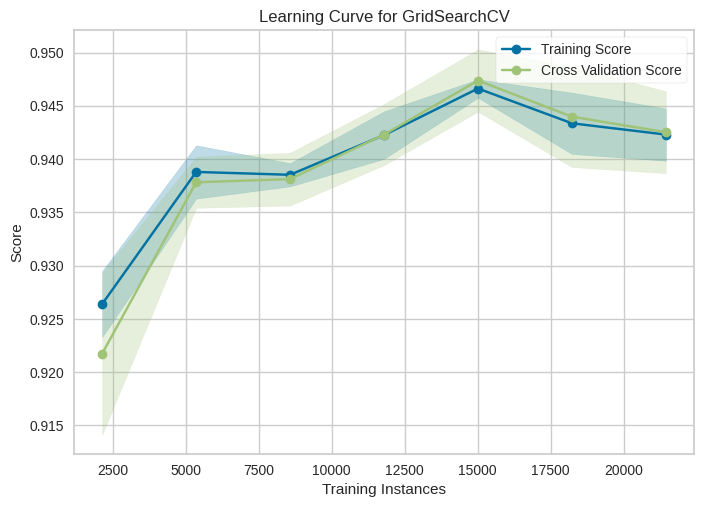

In [131]:
from yellowbrick.model_selection import LearningCurve
import numpy as np
visualizer = LearningCurve(
    clf, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [25]:
Y_pred = clf.predict(X_test)

**Вычислим матрицу ошибок и accuracy_score для этой модели**\
**(accuracy_score будет использоваться для сравнения моделей)**

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[1645  258    5]
 [  83 2860   10]
 [   0    0  501]]
Accuracy score: 0.9336068631107796
f1-score: 0.9440917918957069
cross_val_score: [0.94121596 0.94121596]


# 4. Сравнение и анализ моделей

**Случай 2**\
**В качестве фактора возьмём один - длина пароля в символах.**

**Выделим целевую переменную и факторы**

In [28]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1).drop("seq", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [29]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf1_2 = GridSearchCV(logistic, parameters)

In [30]:
%%time
start_time = time.time()
clf1_2.fit(X_train, Y_train)
end_time = time.time()
time1_2 = end_time - start_time

CPU times: user 3.6 s, sys: 9.8 ms, total: 3.61 s
Wall time: 3.6 s


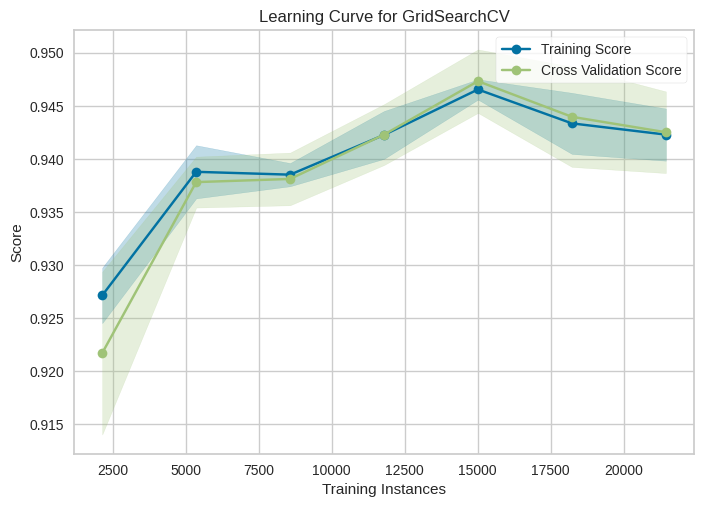

In [132]:
visualizer = LearningCurve(
    clf1_2, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [32]:
Y_pred = clf1_2.predict(X_test)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf1_2, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[1027  753  116]
 [ 618 2299    0]
 [   0    0  549]]
Accuracy score: 0.7226781051846326
f1-score: 0.7516078400286629
cross_val_score: [0.70324506 0.70496084]


**Случай 3**\
**Попробуем в качестве фактора использовать наличие цифр**

In [35]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1).drop("seq", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [36]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf1_3 = GridSearchCV(logistic, parameters)

In [37]:
%%time
start_time = time.time()
clf1_3.fit(X_train, Y_train)
end_time = time.time()
time1_3 = end_time - start_time

CPU times: user 3.34 s, sys: 7.06 ms, total: 3.35 s
Wall time: 3.35 s


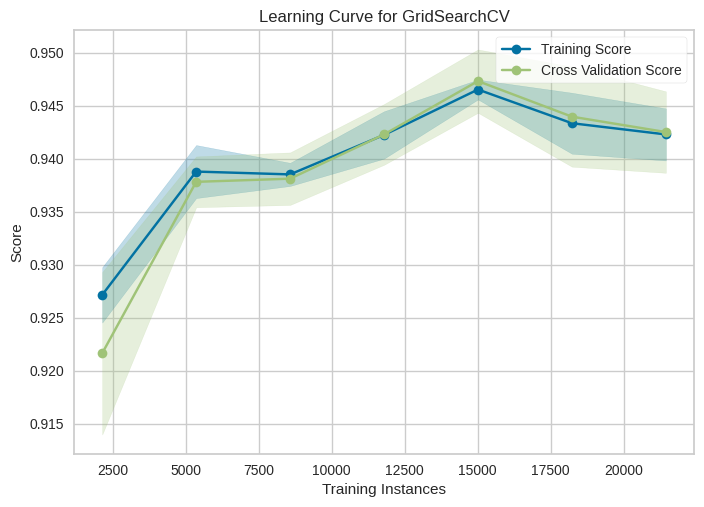

In [133]:
visualizer = LearningCurve(
    clf1_3, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [39]:
Y_pred = clf1_3.predict(X_test)

In [40]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf1_3, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[1273  641    0]
 [  22 2947    0]
 [   1  478    0]]
Accuracy score: 0.7870197687430064
f1-score: 0.5436524542397049
cross_val_score: [0.78821335 0.78642298]


**Случай 4**\
**Попробуем в качестве фактора использовать наличие букв разных регистров**

In [41]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1).drop("seq", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [42]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf1_4 = GridSearchCV(logistic, parameters)

In [43]:
%%time
start_time = time.time()
clf1_4.fit(X_train, Y_train)
end_time = time.time()
time1_4 = end_time - start_time

CPU times: user 1.45 s, sys: 2.83 ms, total: 1.45 s
Wall time: 1.51 s


In [ ]:
visualizer = LearningCurve(
    clf1_4, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [45]:
Y_pred = clf1_4.predict(X_test)

In [46]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf1_4, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[   0 1923    0]
 [   0 2930    1]
 [   0   42  466]]
Accuracy score: 0.6333457665050354
f1-score: 0.5682278445069143
cross_val_score: [0.63550914 0.63580753]


**Случай 5**\
**Попробуем в качестве фактора использовать наличие специальных символов**

In [47]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("distinct_symbols", axis=1).drop("seq", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [48]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf1_5 = GridSearchCV(logistic, parameters)

In [49]:
%%time
start_time = time.time()
clf1_5.fit(X_train, Y_train)
end_time = time.time()
time1_5 = end_time - start_time

CPU times: user 1.65 s, sys: 4.94 ms, total: 1.65 s
Wall time: 1.65 s


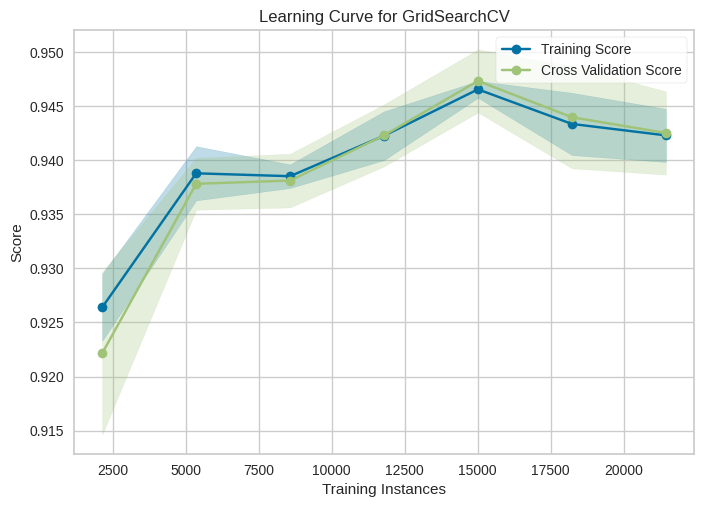

In [135]:
visualizer = LearningCurve(
    clf1_5, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [51]:
Y_pred = clf1_5.predict(X_test)

In [52]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[ 937  980    0]
 [  32 2943    0]
 [  61  409    0]]
Accuracy score: 0.7236105930622901
f1-score: 0.48047662034445277
cross_val_score: [0.71450951 0.71406192]


**Случай 6**\
**Попробуем в качестве фактора использовать количество уникальных символов пароля**

In [53]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("seq", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [54]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf1_6 = GridSearchCV(logistic, parameters)

In [55]:
%%time
start_time = time.time()
clf1_6.fit(X_train, Y_train)
end_time = time.time()
time1_6 = end_time - start_time

CPU times: user 2.91 s, sys: 5.05 ms, total: 2.92 s
Wall time: 2.91 s


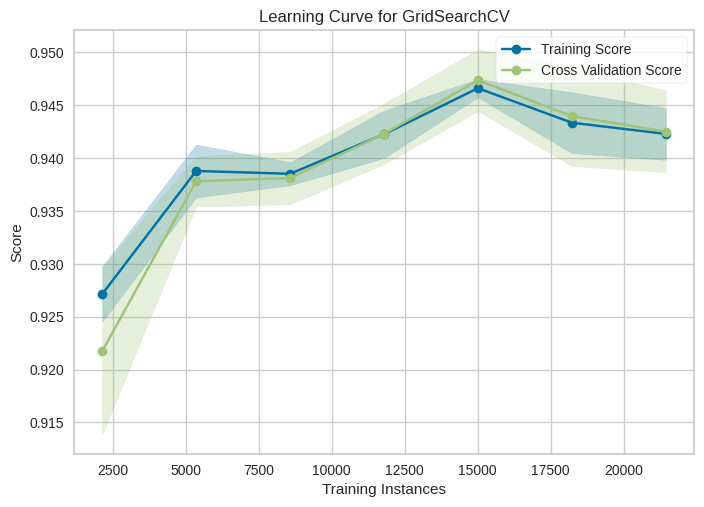

In [136]:
visualizer = LearningCurve(
    clf1_6, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [57]:
Y_pred = clf1_6.predict(X_test)

In [58]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf1_6, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[1185  693   39]
 [ 372 2513   54]
 [   0   34  472]]
Accuracy score: 0.7776948899664304
f1-score: 0.7923433896839113
cross_val_score: [0.78090265 0.78246923]


**Случай 7**\
**Попробуем в качестве фактора использовать наличие простых последовательностей в пароле**

In [59]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("length", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1).drop("distinct_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [60]:
logistic = LogisticRegression(class_weight='balanced')#class_weight='balanced', solver='saga')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf1_7 = GridSearchCV(logistic, parameters)

In [61]:
%%time
start_time = time.time()
clf1_7.fit(X_train, Y_train)
end_time = time.time()
time1_7 = end_time - start_time

CPU times: user 1.02 s, sys: 4.93 ms, total: 1.03 s
Wall time: 1.04 s


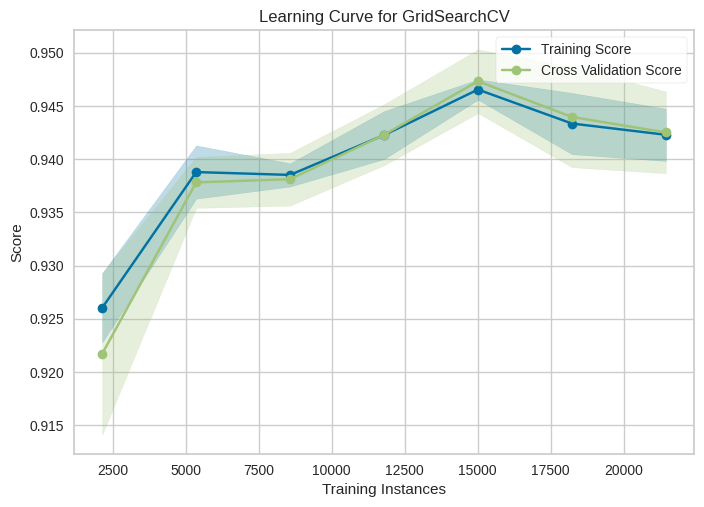

In [137]:
visualizer = LearningCurve(
    clf1_7, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [63]:
Y_pred = clf1_7.predict(X_test)

In [64]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[ 630 1292    0]
 [ 405 2527    0]
 [  50  458    0]]
Accuracy score: 0.5887728459530026
f1-score: 0.3733634635504471
cross_val_score: [0.58724357 0.59015293]


**Случаи 2-7 представляют собой однофакторную классификацию с факторами length, lower & upper, digit, other_symbols и distinct_symbols соответственно.**

**В случаях 2 и 6 классификация работает на наборе данных лучше, чем в остальных - это можно увидеть как по метрике f1_score, так и по матрице ошибок (хотя и в этих случаях модели требует улучшений и ещё непригодны для использования).**\
**Рассмотрим комбинацию случаев 2, 6 и 7 - модель с факторами длины пароля, количества символов и наличия простых последовательностей. (хоть и в случае 7 однофакторная модель показала не самые лучшие результаты, фактор наличия простых последовательностей должен присутствовать в итоговой модели, так как в противном случае она будет предсказывать высокую стойкость для паролей из простых последовательностей, вроде qwertyui или 123456789).**

**Случай 8**\
**Попробуем в качестве факторов использовать длину пароля и количество уникальных символов**

In [65]:
X = df.drop("password", axis=1).drop("strength", axis=1).drop("digit", axis=1).drop("lower & upper", axis=1).drop("other_symbols", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [66]:
logistic = LogisticRegression(class_weight='balanced')
parameters = {'solver':('liblinear', 'sag', 'saga')}
clf1_8 = GridSearchCV(logistic, parameters)

In [67]:
%%time
start_time = time.time()
clf1_8.fit(X_train, Y_train)
end_time = time.time()
time1_8 = end_time - start_time

CPU times: user 5.24 s, sys: 11.1 ms, total: 5.25 s
Wall time: 5.25 s


In [ ]:
visualizer = LearningCurve(
    clf1_8, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [70]:
Y_pred = clf1_8.predict(X_test)

In [71]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(Y_test, Y_pred))
accuracy_score1 = metrics.accuracy_score(Y_test, Y_pred)
f1_score1 = metrics.f1_score(Y_test, Y_pred, average='macro')
print("Accuracy score:", accuracy_score1)
print("f1-score:", f1_score1)
clf_scores1 = cross_val_score(clf1_8, X, Y, cv=2)
print("cross_val_score:", clf_scores1)

Матрица ошибок:

[[1244  218    8]
 [ 177 1946   41]
 [   0    7  381]]
Accuracy score: 0.8878667329686724
f1-score: 0.8966502484476186
cross_val_score: [0.88563969 0.89824692]


**Теперь изобразим f1-score для каждого случая, время обучения модели и найдём оптимальный из этих случаев**

In [72]:
pd.DataFrame.from_dict({"Случай": [1, 2, 3, 4, 5, 6, 7, 8],
                       "Время обучения": [5.45, 3.91, 2.55, 1.43, 2.97, 3.36, 2.86, 4.91],
                       "f1-score": [0.9519, 0.7845, 0.5105, 0.7232, 0.4251, 0.8751, 0.6424, 0.9259]})

,Случай,Время обучения,f1-score
0,1,5.45,0.9519
1,2,3.91,0.7845
2,3,2.55,0.5105
3,4,1.43,0.7232
4,5,2.97,0.4251
5,6,3.36,0.8751
6,7,2.86,0.6424
7,8,4.91,0.9259


# 5. Выводы

**Лучшие результаты по accuracy_score  показали случаи 1 и 8. 1-й имеет чуть более высокое значение accuracy_score, а в 8-ом случае модель обучается немного быстрее. **\
**Для последующих моделей я возьму случай 1.**

# 6. Построение моделей с учётом выводов

## Модель II (метод ближайших соседей)

In [73]:
from sklearn.neighbors import KNeighborsRegressor

X = df.drop("strength", axis=1).drop("password", axis=1)
Y = df.strength
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) 

In [74]:
regressor_n = KNeighborsRegressor()
parameters = [{'n_neighbors': [2, 5, 10], 'weights': ['uniform','distance']}]
clf2 = GridSearchCV(regressor_n, parameters)

In [75]:
%%time
start_time = time.time()
clf2.fit(X_train, Y_train)
end_time = time.time()
time2 = end_time - start_time

CPU times: user 2.39 s, sys: 7 ms, total: 2.39 s
Wall time: 2.39 s


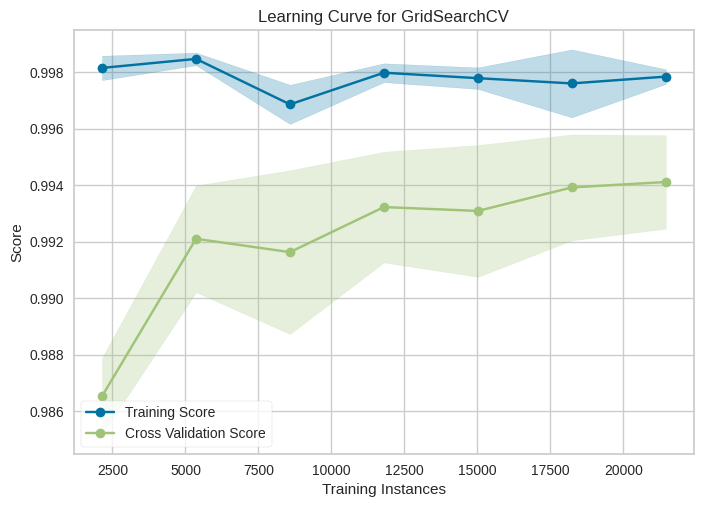

In [139]:
visualizer = LearningCurve(
    clf2, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [77]:
Y_pred = clf2.predict(X_test)

In [78]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
accuracy_score2 = metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred])
f1_score2 = metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average='macro')
print("Accuracy score:", accuracy_score2)
print("f1-score:", f1_score2)
clf_scores2 = cross_val_score(clf2, X, Y, cv=2)
print("cross_val_score:", clf_scores2)

Матрица ошибок:

[[1853    5    0]
 [   5 3013    0]
 [   2    2  482]]
Accuracy score: 0.9973890339425587
f1-score: 0.996884271285094
cross_val_score: [0.9941313  0.99311865]


## Модель III (метод опорных векторов)

In [79]:
from sklearn.svm import SVC

In [80]:
svc = SVC()
parameters = {'C':[1,10,100,1000]}
clf3 = GridSearchCV(svc, parameters)

In [81]:
%%time
start_time = time.time()
clf3.fit(X_train, Y_train)
end_time = time.time()
time3 = end_time - start_time

CPU times: user 11.6 s, sys: 420 ms, total: 12 s
Wall time: 12 s


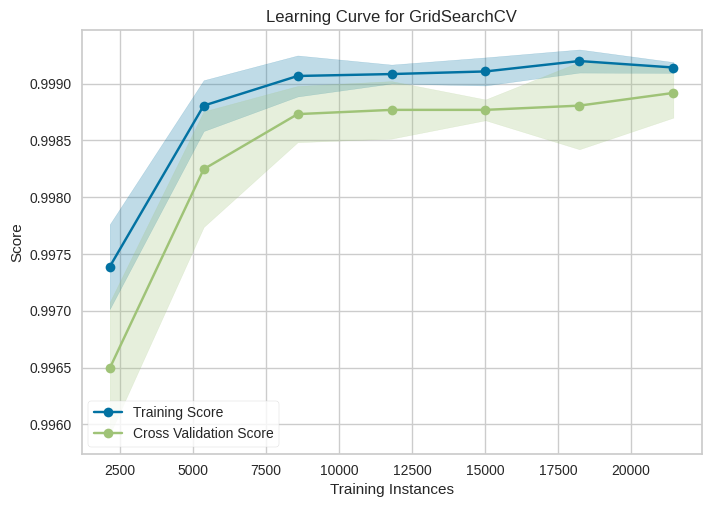

In [140]:
visualizer = LearningCurve(
    clf3, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [83]:
Y_pred = clf3.predict(X_test)

In [84]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
accuracy_score3 = metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred])
f1_score3 = metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average='macro')
print("Accuracy score:", accuracy_score3)
print("f1-score:", f1_score3)
clf_scores3 = cross_val_score(clf3, X, Y, cv=2)
print("cross_val_score:", clf_scores3)

Матрица ошибок:

[[1858    0    0]
 [   6 3012    0]
 [   1    0  485]]
Accuracy score: 0.9986945169712794
f1-score: 0.998698301623508
cross_val_score: [0.99895561 0.99873182]


## Модель IV (классификатор дерева решений)

In [85]:
from sklearn.tree import DecisionTreeRegressor

In [86]:
regressor = DecisionTreeRegressor()
parameters = {"splitter": ["best", "random"]}
clf4 = GridSearchCV(regressor, parameters)

In [87]:
%%time
start_time = time.time()
clf4.fit(X_train, Y_train)
end_time = time.time()
time4 = end_time - start_time

CPU times: user 118 ms, sys: 1.99 ms, total: 120 ms
Wall time: 121 ms


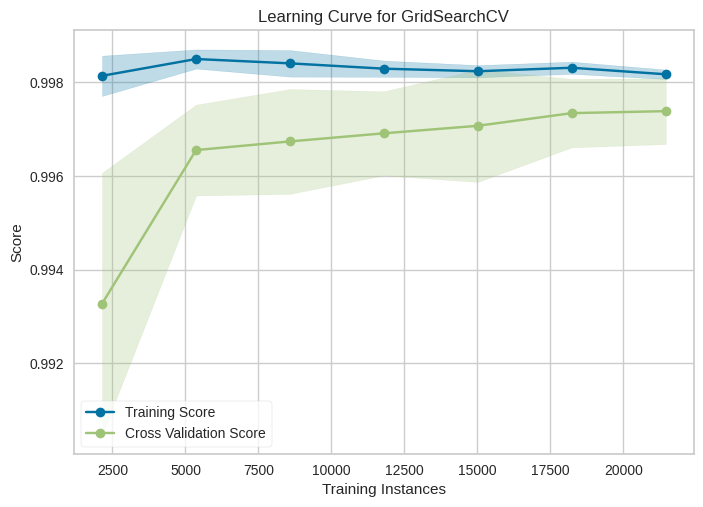

In [141]:
visualizer = LearningCurve(
    clf4, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [89]:
Y_pred = clf4.predict(X_test)

In [90]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
accuracy_score4 = metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred])
f1_score4 = metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average='macro')
print("Accuracy score:", accuracy_score4)
print("f1-score:", f1_score4)
clf_scores4 = cross_val_score(clf4, X, Y, cv=2)
print("cross_val_score:", clf_scores4)

Матрица ошибок:

[[1858    0    0]
 [   6 3012    0]
 [   0    0  486]]
Accuracy score: 0.9988810145468109
f1-score: 0.9991309795282944
cross_val_score: [0.99736527 0.99668357]


## Модель V (метод Случайный лес (Random Forests))

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier()
parameters = { 
    'n_estimators': [5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf5 = GridSearchCV(rfc, parameters)

In [93]:
%%time
start_time = time.time()
clf5.fit(X_train, Y_train)
end_time = time.time()
time5 = end_time - start_time

CPU times: user 1.77 s, sys: 10.9 ms, total: 1.78 s
Wall time: 1.79 s


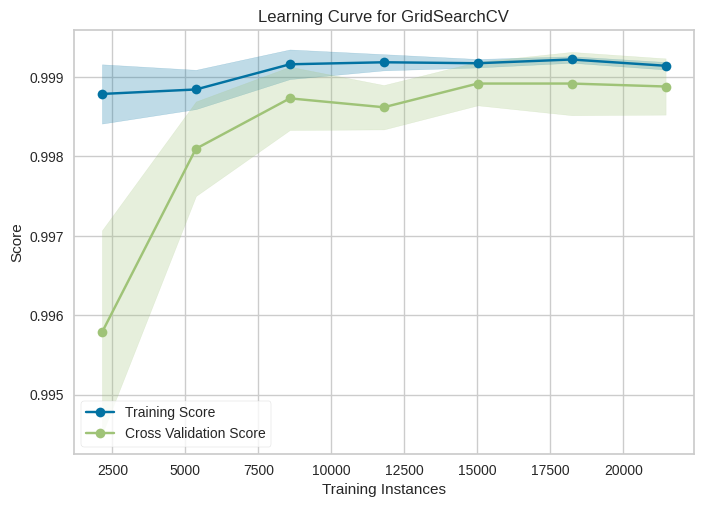

In [142]:
visualizer = LearningCurve(
    clf5, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [95]:
Y_pred = clf5.predict(X_test)

In [96]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
accuracy_score5 = metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred])
f1_score5 = metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average='macro')
print("Accuracy score:", accuracy_score5)
print("f1-score:", f1_score5)
clf_scores5 = cross_val_score(clf5, X, Y, cv=2)
print("cross_val_score:", clf_scores5)

Матрица ошибок:

[[1858    0    0]
 [   5 3013    0]
 [   0    0  486]]
Accuracy score: 0.9990675121223425
f1-score: 0.9992757417620118
cross_val_score: [0.99910481 0.99880642]


## Модель VI (наивный байесовский метод (Naive Bayes))

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
multi = MultinomialNB(class_prior=[0.3, 0.6, 0.1])
parameters = { 
    'fit_prior': [True, False]}
clf6 = GridSearchCV(multi, parameters)

In [99]:
%%time
start_time = time.time()
clf6.fit(X_train, Y_train)
end_time = time.time()
time6 = end_time - start_time

CPU times: user 154 ms, sys: 0 ns, total: 154 ms
Wall time: 171 ms


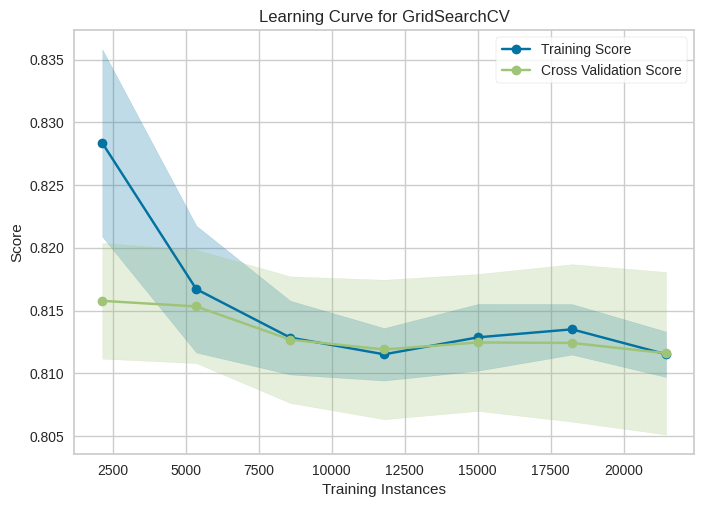

In [143]:
visualizer = LearningCurve(
    clf6, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show()

In [101]:
Y_pred = clf6.predict(X_test)

In [102]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
accuracy_score6 = metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred])
f1_score6 = metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average='macro')
print("Accuracy score:", accuracy_score6)
print("f1-score:", f1_score6)
clf_scores6 = cross_val_score(clf6, X, Y, cv=2)
print("cross_val_score:", clf_scores6)

Матрица ошибок:

[[1021  836    1]
 [ 118 2897    3]
 [  35    7  444]]
Accuracy score: 0.8135024244684819
f1-score: 0.8271955203636338
cross_val_score: [0.81156285 0.81014547]


## Модель VII (нелинейная классификация)

In [103]:
svm_rbf = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
parameters = {'C':[1,10,100,1000]}
clf7 = GridSearchCV(svm_rbf, parameters)

In [104]:
%%time
start_time = time.time()
clf7.fit(X_train, Y_train)
end_time = time.time()
time7 = end_time - start_time

CPU times: user 7.19 s, sys: 261 ms, total: 7.45 s
Wall time: 7.43 s


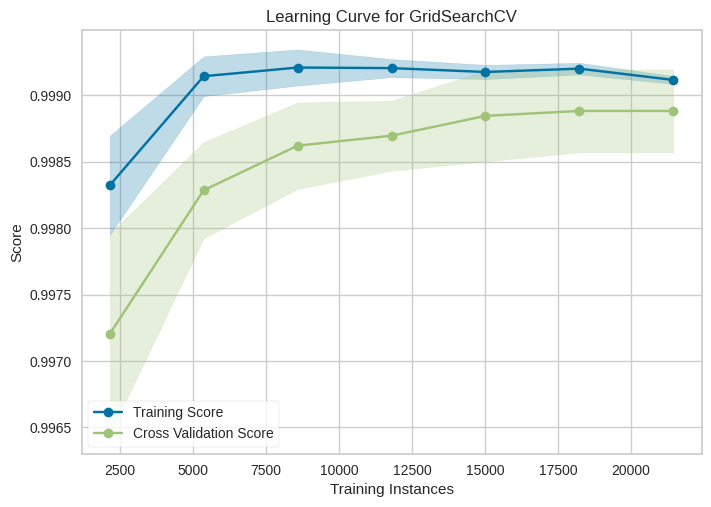

In [144]:
visualizer = LearningCurve(
    clf7, train_sizes=np.linspace(0.1, 1.0, 7)
).fit(X, Y).show() 

In [106]:
Y_pred = clf7.predict(X_test)

In [107]:
print("Матрица ошибок:\n")
print(metrics.confusion_matrix(list(Y_test), [int(x) for x in Y_pred]))
accuracy_score7 = metrics.accuracy_score(list(Y_test), [int(x) for x in Y_pred])
f1_score7 = metrics.f1_score(list(Y_test), [int(x) for x in Y_pred], average='macro')
print("Accuracy score:", accuracy_score6)
print("f1-score:", f1_score6)
clf_scores7 = cross_val_score(clf7, X, Y, cv=2)
print("cross_val_score:", clf_scores7)

Матрица ошибок:

[[1857    0    1]
 [   6 3012    0]
 [   1    0  485]]
Accuracy score: 0.8135024244684819
f1-score: 0.8271955203636338
cross_val_score: [0.99880642 0.99873182]


**Изобразим для каждой модели время обучения, accuracy_score, f1-score и cross_val_score в виде DataFrame и на диаграмме**

In [108]:
times = [time1, time2, time3, time4, time5, time6, time7]
f1_scores = [f1_score1, f1_score2, f1_score3, f1_score4, f1_score5, f1_score6, f1_score7]
cross_val_scores = [clf_scores1.mean(),
                    clf_scores2.mean(),
                    clf_scores3.mean(),
                    clf_scores4.mean(),
                    clf_scores5.mean(),
                    clf_scores6.mean(),
                    clf_scores7.mean()]
accuracy_scores = [accuracy_score1,
                   accuracy_score2,
                   accuracy_score3,
                   accuracy_score4,
                   accuracy_score5,
                   accuracy_score6,
                   accuracy_score7]
models = ["I", "II", "III", "IV", "V", "VI", "VII"]

In [109]:
pd.DataFrame.from_dict({"Модель": models, "Время обучения": times, "accuracy_score": accuracy_scores, "f1-score": f1_scores, "cross_val_score": cross_val_scores})

,Модель,Время обучения,accuracy_score,f1-score,cross_val_score
0,I,7.451973,0.887867,0.896650,0.891943
1,II,2.392819,0.997389,0.996884,0.993625
2,III,12.041110,0.998695,0.998698,0.998844
3,IV,0.121018,0.998881,0.999131,0.997024
4,V,1.791030,0.999068,0.999276,0.998956
5,VI,0.170697,0.813502,0.827196,0.810854
6,VII,7.425325,0.998508,0.998266,0.998769


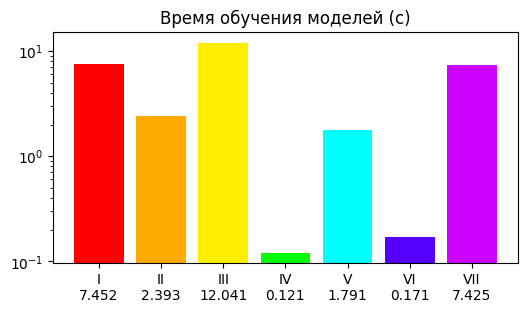

In [110]:
groups = ["I\n{}".format(round(times[0], 3)), 
          "II\n{}".format(round(times[1], 3)),
          "III\n{}".format(round(times[2], 3)),
          "IV\n{}".format(round(times[3], 3)),
          "V\n{}".format(round(times[4], 3)),
          "VI\n{}".format(round(times[5], 3)),
          "VII\n{}".format(round(times[6], 3))]
colors = ["#F00", "#FA0", "#FE0", "#0F0", "#0FF", "#50F", "#C0F"]
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_yscale('log')
plt.bar(groups, times, color=colors)
plt.title("Время обучения моделей (c)")
plt.show()

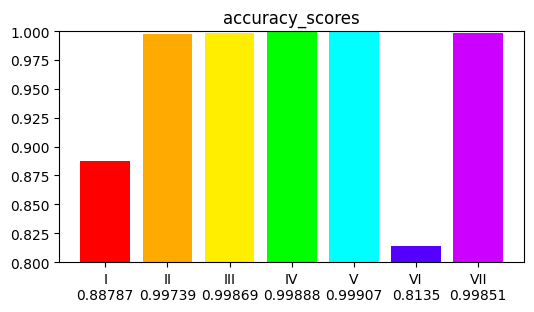

In [119]:
groups = ["I\n{}".format(round(accuracy_scores[0], 5)), 
          "II\n{}".format(round(accuracy_scores[1], 5)),
          "III\n{}".format(round(accuracy_scores[2], 5)),
          "IV\n{}".format(round(accuracy_scores[3], 5)),
          "V\n{}".format(round(accuracy_scores[4], 5)),
          "VI\n{}".format(round(accuracy_scores[5], 5)),
          "VII\n{}".format(round(accuracy_scores[6], 5))]

fig, ax = plt.subplots(figsize=(6, 3))
plt.ylim(ymax = 1, ymin = 0.8)
plt.bar(groups, accuracy_scores, color=colors)
plt.title("accuracy_scores")
plt.show()

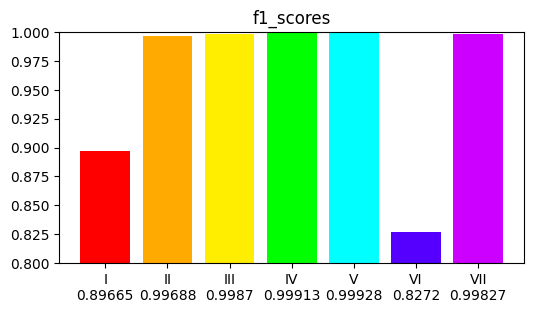

In [120]:
groups = ["I\n{}".format(round(f1_scores[0], 5)), 
          "II\n{}".format(round(f1_scores[1], 5)),
          "III\n{}".format(round(f1_scores[2], 5)),
          "IV\n{}".format(round(f1_scores[3], 5)),
          "V\n{}".format(round(f1_scores[4], 5)),
          "VI\n{}".format(round(f1_scores[5], 5)),
          "VII\n{}".format(round(f1_scores[6], 5))]

fig, ax = plt.subplots(figsize=(6, 3))
plt.ylim(ymax = 1, ymin = 0.8)
plt.bar(groups, f1_scores, color=colors)
plt.title("f1_scores")
plt.show()

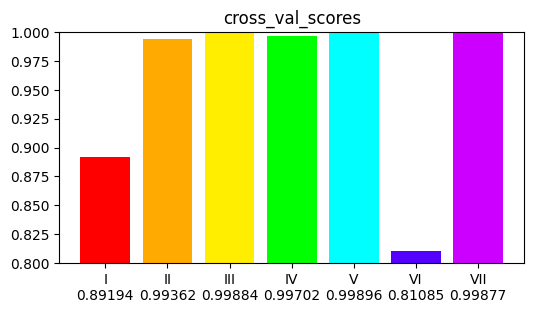

In [121]:
groups = ["I\n{}".format(round(cross_val_scores[0], 5)), 
          "II\n{}".format(round(cross_val_scores[1], 5)),
          "III\n{}".format(round(cross_val_scores[2], 5)),
          "IV\n{}".format(round(cross_val_scores[3], 5)),
          "V\n{}".format(round(cross_val_scores[4], 5)),
          "VI\n{}".format(round(cross_val_scores[5], 5)),
          "VII\n{}".format(round(cross_val_scores[6], 5))]

fig, ax = plt.subplots(figsize=(6, 3))
plt.ylim(ymax = 1, ymin = 0.8)
plt.bar(groups, cross_val_scores, color=colors)
plt.title("cross_val_scores")
plt.show()

# 7. Итоговый результат

**Наилучшей оказалась модель V. По времени обучения она занимает третье место, но она оказалась лучшей по метрикам accuracy_score, f1_score и cross_val_score. Каждое из этих значений превышает 0.999.**\
**Продемонстрируем её работу на примере. Ниже я написал три функции на основе этой модели: первая предсказывает значение стойкости для одного пароля, вторая - значения для списка паролей, третья - для csv-файла со столбцом password, содержащем пароли.**


In [124]:
import numpy as np
def predict(password):
  length1 = len(password)
  digit1 = is_digit_in_password(password)
  lower_upper1 = lower_upper(password)
  other_symbols1 = other_symbols(password)
  distinct_symbols1 = distinct_symbols(password)
  seq1 = seq(password)
  return clf5.predict([[length1, digit1, lower_upper1, other_symbols1, distinct_symbols1, seq1]])[0]

def predict_many(passwords):
  length1 = [len(password) for password in passwords]
  digit1 = [is_digit_in_password(password) for password in passwords]
  lower_upper1 = [lower_upper(password) for password in passwords]
  other_symbols1 = [other_symbols(password) for password in passwords]
  distinct_symbols1 = [distinct_symbols(password) for password in passwords]
  seq1 = [seq(password) for password in passwords]
  return_list = []
  for x in range(len(passwords)):
    return_list.append(clf5.predict([[length1[x], digit1[x], lower_upper1[x], 
                                          other_symbols1[x], distinct_symbols1[x], seq1[x]]])[0])
  return return_list

def predict_for_file(file):
  df = pd.read_csv(file)#.iloc[:, 0]
  df['length'] = df["password"].str.len()
  df["digit"] = df.apply(lambda x: is_digit_in_password(x["password"]), axis=1)
  df["lower & upper"] = df.apply(lambda x: lower_upper(x["password"]), axis=1)
  df["other_symbols"] = df.apply(lambda x: other_symbols(x["password"]), axis=1)
  df["distinct_symbols"] = df.apply(lambda x: distinct_symbols(x["password"]), axis=1)
  df["seq"] = df.apply(lambda x: seq(x["password"]), axis=1)
  X = df[["length", "digit", "lower & upper", "other_symbols", "distinct_symbols", "seq"]]
  P = df["password"]
  Y = clf5.predict(X)
  return pd.DataFrame({"Password": P, "Strength": Y})

In [128]:
# Предскажем значения для трёх паролей
print(predict("qwerty123"))
print(predict("AiDOpowo12"))
print(predict("dsfljqheipcou43itigt"))

0
1
2


In [129]:
# Предскажем список значений для списка паролей
print(predict_many(["ЫВАПРОЛД", "A12344T24RFFV", "jGiWEDKWIRIJdgu234x'"]))

[0, 1, 2]


In [130]:
# Предскажем DataFrame значений для csv-файла и выведем случайные 30 его записей
df_predict = predict_for_file("data.csv")
df_predict.sample(30)

,Password,Strength
15701,ОООООООО,0
15138,spasii84,1
12898,moocowmoo1,1
26162,ЕНГШЩЗХЪФЫВАПР,0
11120,jrj7tst383lv,1
5912,sativa1,0
15419,3p3PjxzEwOQTH2ss,2
19087,65tran,0
21979,ufygi296,1
12187,0254portero,1
